<a href="https://colab.research.google.com/github/dquintani/covid/blob/main/epidemiologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drive


In [ ]:
#from google.colab import drive
#drive.mount("/drive")
#directory = "/drive/My Drive/Colab Notebooks/epidemiologia/"
#directory

Mounted at /drive


'/drive/My Drive/Colab Notebooks/epidemiologia/'

# Dependencias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#interactive table
from vega_datasets import data
%load_ext google.colab.data_table

#dates
import matplotlib.dates as mdates


# CASOS

Casos diarios y acumulados

In [ ]:
casos_diarios = pd.read_csv("https://github.com/mauforonda/covid19-bolivia-udape/raw/master/confirmados_diarios.csv",
                    index_col = 0)
casos_diarios["Bolivia"] = casos_diarios.sum(axis=1)
casos_diarios.to_csv("/drive/My Drive/Colab Notebooks/epidemiologia/casos_diarios.csv")
casos_diarios

,Chuquisaca,La Paz,Cochabamba,Oruro,Potosí,Tarija,Santa Cruz,Beni,Pando,Bolivia
2020-03-10,0,0,0,0,0,0,0,0,0,0
2020-03-11,0,0,0,0,0,0,1,0,0,1
2020-03-12,0,0,0,0,0,0,0,0,0,0
2020-03-13,0,0,1,6,0,0,0,0,0,7
2020-03-14,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-06-19,167,604,272,63,97,49,364,28,4,1648
2021-06-20,139,294,337,40,99,22,121,19,15,1086
2021-06-21,113,213,188,34,47,24,115,17,13,764
2021-06-22,153,124,390,68,74,148,658,35,17,1667


In [ ]:
casos_acumulados = casos_diarios.cumsum(axis = 0)
casos_acumulados.to_csv(directory + "casos_acumulados.csv")

casos_acumulados

,Chuquisaca,La Paz,Cochabamba,Oruro,Potosí,Tarija,Santa Cruz,Beni,Pando,Bolivia
2020-03-10,0,0,0,0,0,0,0,0,0,0
2020-03-11,0,0,0,0,0,0,1,0,0,1
2020-03-12,0,0,0,0,0,0,1,0,0,1
2020-03-13,0,0,1,6,0,0,1,0,0,8
2020-03-14,0,0,1,6,0,0,1,0,0,8
...,...,...,...,...,...,...,...,...,...,...
2021-06-19,25193,87683,60959,21600,19188,32575,147965,19306,6491,420960
2021-06-20,25332,87977,61296,21640,19287,32597,148086,19325,6506,422046
2021-06-21,25445,88190,61484,21674,19334,32621,148201,19342,6519,422810
2021-06-22,25598,88314,61874,21742,19408,32769,148859,19377,6536,424477


# Muertes

Muertes diarias y acumuladas

In [ ]:
muertes_diarias = pd.read_csv("https://github.com/mauforonda/covid19-bolivia-udape/raw/master/decesos_diarios.csv",
                    index_col = 0)
muertes_diarias["Bolivia"] = muertes_diarias.sum(axis=1)
muertes_diarias.to_csv(directory + "muertes_diarias.csv")

muertes_diarias

,Chuquisaca,La Paz,Cochabamba,Oruro,Potosí,Tarija,Santa Cruz,Beni,Pando,Bolivia
2020-03-10,0,0,0,0,0,0,0,0,0,0
2020-03-11,0,0,0,0,0,0,0,0,0,0
2020-03-12,0,0,0,0,0,0,0,0,0,0
2020-03-13,0,0,0,0,0,0,0,0,0,0
2020-03-14,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-06-19,15,5,17,5,2,3,27,5,0,79
2021-06-20,4,5,19,2,5,4,4,1,0,44
2021-06-21,8,8,11,0,2,2,7,1,3,42
2021-06-22,6,6,20,5,7,4,15,3,3,69


In [ ]:
muertes_acumuladas = muertes_diarias.cumsum(axis = 0)
muertes_acumuladas.to_csv(directory + "muertes_acumuladas.csv")

muertes_acumuladas

,Chuquisaca,La Paz,Cochabamba,Oruro,Potosí,Tarija,Santa Cruz,Beni,Pando,Bolivia
2020-03-10,0,0,0,0,0,0,0,0,0,0
2020-03-11,0,0,0,0,0,0,0,0,0,0
2020-03-12,0,0,0,0,0,0,0,0,0,0
2020-03-13,0,0,0,0,0,0,0,0,0,0
2020-03-14,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2021-06-19,1111,2250,2378,1081,659,822,5038,821,301,14461
2021-06-20,1115,2255,2397,1083,664,826,5042,822,301,14505
2021-06-21,1123,2263,2408,1083,666,828,5049,823,304,14547
2021-06-22,1129,2269,2428,1088,673,832,5064,826,307,14616


# Pruebas
Pruebas procesadas. Pruebas acumuladas = (casos acumulados)+(descartados acumulados)

In [ ]:
pruebas_edu = pd.read_csv("https://raw.githubusercontent.com/pr0nstar/covid19-data/master/processed/bolivia/testing.csv",
                    index_col = 0)
pruebas_edu = pruebas_edu[pruebas_edu.columns].apply(pd.to_numeric, errors = "coerce")
#pruebas_edu



In [ ]:
col_names = ['La Paz', 'Cochabamba', 'Santa Cruz','Oruro','Potosí','Tarija','Chuquisaca', 'Beni','Pando']

In [ ]:
descartados = pruebas_edu.iloc[1:,[1,3,5,7,9,11,13,15,17]]
for i in range(9):
    descartados.rename(columns={descartados.columns[i] : col_names[i]}, inplace=True)
descartados["Bolivia"] = descartados.sum(axis=1, min_count=9)

descartados.to_csv(directory + "descartados_acumulados.csv")

#descartados

In [ ]:
sospechosos = pruebas_edu.iloc[1:,[0,2,4,6,8,10,12,14,16]]
#for i in range(9):
#    sospechosos.rename(columns={sospechosos.columns[i] : col_names[i]}, inplace=True)
sospechosos["Bolivia"] = sospechosos.sum(axis=1)
#sospechosos

,Beni,Bolivia,Chuquisaca,Cochabamba,La Paz,Oruro,Pando,Potosí,Santa Cruz,Tarija
2020-05-07,461.0,10128.0,186.0,1241.0,2565.0,579.0,88.000000,191.0,4761.0,56.0
2020-05-08,542.0,10585.0,187.0,1293.0,2693.0,587.0,91.000000,205.0,4918.0,69.0
2020-05-09,551.0,11203.5,215.0,1339.0,2816.0,595.0,96.333333,221.0,5174.0,71.0
2020-05-10,558.0,11822.0,243.0,1356.0,2887.0,615.0,101.666667,250.0,5521.0,71.0
2020-05-11,642.0,12440.5,254.0,1365.0,2970.0,628.0,107.000000,257.0,6168.0,72.0
...,...,...,...,...,...,...,...,...,...,...
2021-06-19,59946.0,1722362.0,87740.0,301172.0,342878.0,69056.0,22906.000000,65845.0,679263.0,93556.0
2021-06-20,60010.0,1728100.0,88125.0,302411.0,345344.0,69277.0,23002.000000,66117.0,680178.0,93636.0
2021-06-21,60120.0,1732241.0,88451.0,303354.0,346711.0,69423.0,23039.000000,66212.0,681181.0,93750.0
2021-06-22,60320.0,1743068.0,89022.0,306171.0,347811.0,69684.0,23136.000000,66361.0,686100.0,94463.0


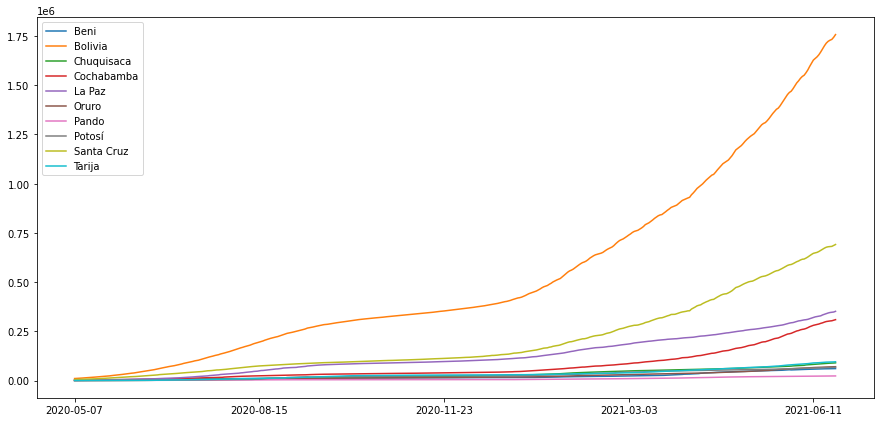

In [ ]:
pruebas_acum = casos_acumulados + descartados
pruebas_acum = pruebas_acum.drop(pruebas_acum.index[0:58], axis=0).interpolate()
pruebas_acum.plot(figsize = (15,7))
plt.legend()

pruebas_acum.to_csv(directory + "pruebas_acum.csv")

pruebas_acum

In [ ]:
pruebas_acum.to_csv("pruebas_acum.csv")

,Beni,Bolivia,Chuquisaca,Cochabamba,La Paz,Oruro,Pando,Potosí,Santa Cruz,Tarija
2020-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-08,81.0,457.0,1.0,52.0,128.0,8.0,3.000000,14.0,157.0,13.0
2020-05-09,9.0,618.5,28.0,46.0,123.0,8.0,5.333333,16.0,256.0,2.0
2020-05-10,7.0,618.5,28.0,17.0,71.0,20.0,5.333333,29.0,347.0,NaN
2020-05-11,84.0,618.5,11.0,9.0,83.0,13.0,5.333333,7.0,647.0,1.0
...,...,...,...,...,...,...,...,...,...,...
2021-06-19,118.0,9088.0,934.0,1648.0,3172.0,350.0,25.000000,227.0,2383.0,231.0
2021-06-20,64.0,5738.0,385.0,1239.0,2466.0,221.0,96.000000,272.0,915.0,80.0
2021-06-21,110.0,4141.0,326.0,943.0,1367.0,146.0,37.000000,95.0,1003.0,114.0
2021-06-22,200.0,10827.0,571.0,2817.0,1100.0,261.0,97.000000,149.0,4919.0,713.0


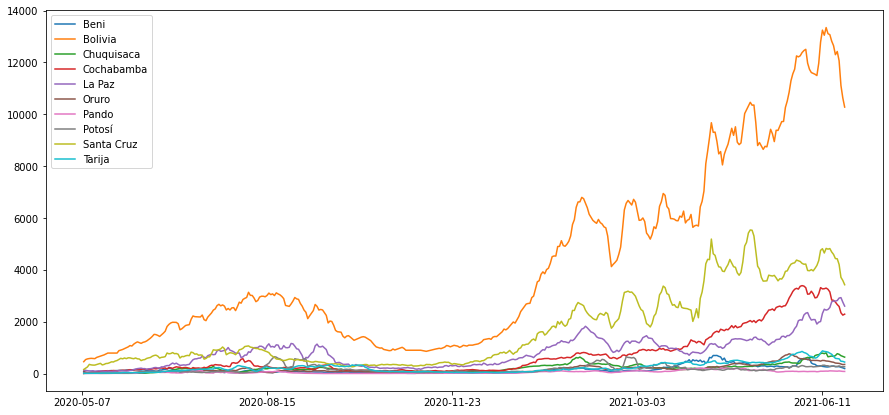

In [ ]:
pruebas_diarias_NaN = pruebas_acum.diff()

#getting rid of negatives
pruebas_diarias = pruebas_diarias_NaN[pruebas_diarias_NaN > 0 ]
pruebas_diarias.rolling(7,min_periods=1).mean().interpolate().plot(figsize = (15,7))
#ax.plot(pruebas_diarias.index, pruebas_diarias)
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# ax.xaxis.set_minor_locator(mdates.WeekdayLocator(interval=1))
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%M"))
# ax.grid()
pruebas_diarias.to_csv(directory + "pruebas_diarias.csv")

pruebas_diarias

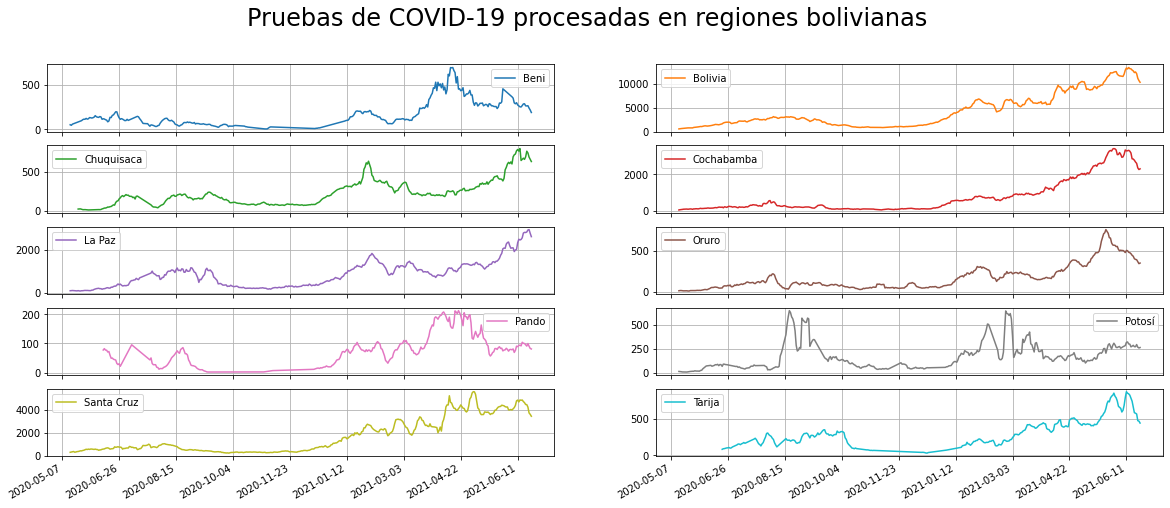

In [ ]:
axs = pruebas_diarias.rolling(7).mean().interpolate().plot(
                                                           subplots=True,
                                                           layout=(5,2),
                                                           sharey=False,
                                                           figsize = (20,8),
                                                           legend=True,
                                                           grid=True)

plt.suptitle("Pruebas de COVID-19 procesadas en regiones bolivianas", fontsize="24")
plt.legend(loc="upper left")

# Positividad
Positividad = (confirmados)/(pruebas procesadas)

,Beni,Bolivia,Chuquisaca,Cochabamba,La Paz,Oruro,Pando,Potosí,Santa Cruz,Tarija
2020-05-08,1.000000,0.404814,0.000000,0.153846,0.179688,0.125000,0.000000,0.000000,0.439490,0.230769
2020-05-09,0.000000,0.276475,0.107143,0.108696,0.056911,0.625000,0.000000,0.000000,0.585938,0.500000
2020-05-10,0.285714,0.192401,0.035714,0.529412,0.112676,0.150000,0.000000,0.000000,0.276657,NaN
2020-05-11,0.892857,0.444624,0.000000,0.555556,0.048193,0.000000,0.000000,0.142857,0.293663,0.000000
2020-05-12,0.000000,0.215036,NaN,0.179487,0.029126,0.222222,NaN,0.000000,0.392308,0.136364
...,...,...,...,...,...,...,...,...,...,...
2021-06-19,0.237288,0.181338,0.178801,0.165049,0.190416,0.180000,0.160000,0.427313,0.152749,0.212121
2021-06-20,0.296875,0.189265,0.361039,0.271994,0.119221,0.180995,0.156250,0.363971,0.132240,0.275000
2021-06-21,0.154545,0.184496,0.346626,0.199364,0.155816,0.232877,0.351351,0.494737,0.114656,0.210526
2021-06-22,0.175000,0.153967,0.267951,0.138445,0.112727,0.260536,0.175258,0.496644,0.133767,0.207574


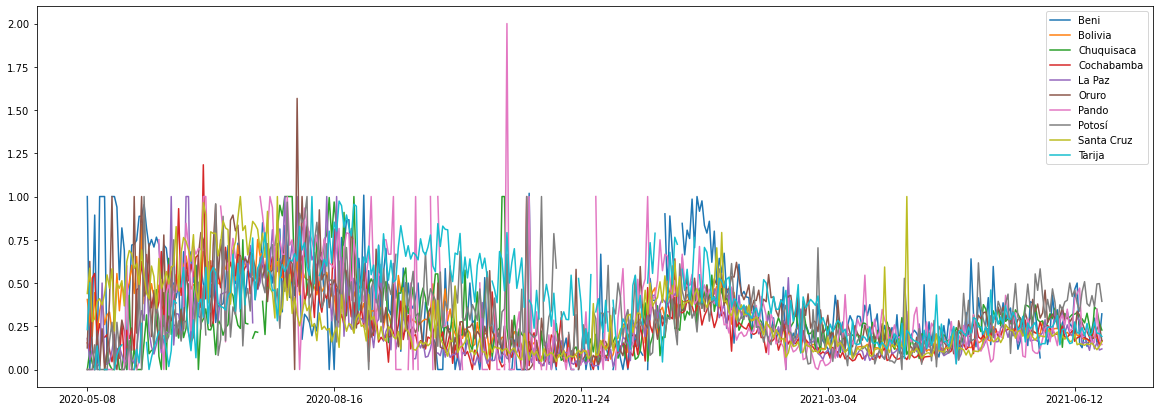

In [ ]:
positividad_diaria = casos_diarios / pruebas_diarias
positividad_diaria = positividad_diaria.drop(positividad_diaria.index[0:59])
positividad_diaria.plot(figsize = (20,7))

positividad_diaria.to_csv(directory + "positividad_diaria.csv")

positividad_diaria

In [ ]:
positividad_diaria_adj = positividad_diaria.rolling(7,min_periods=1).mean()


positividad_diaria_adj.to_csv(directory + "positividad_diaria_ajuste.csv")

positividad_diaria_adj

,Beni,Bolivia,Chuquisaca,Cochabamba,La Paz,Oruro,Pando,Potosí,Santa Cruz,Tarija
2020-05-08,1.000000,0.404814,0.000000,0.153846,0.179688,0.125000,0.000000,0.000000,0.439490,0.230769
2020-05-09,0.500000,0.340645,0.053571,0.131271,0.118299,0.375000,0.000000,0.000000,0.512714,0.365385
2020-05-10,0.428571,0.291230,0.047619,0.263985,0.116425,0.300000,0.000000,0.000000,0.434028,0.365385
2020-05-11,0.544643,0.329579,0.035714,0.336877,0.099367,0.225000,0.000000,0.035714,0.398937,0.243590
2020-05-12,0.435714,0.306670,0.035714,0.305399,0.085319,0.224444,0.000000,0.028571,0.397611,0.216783
...,...,...,...,...,...,...,...,...,...,...
2021-06-19,0.218639,0.181137,0.272156,0.181599,0.191985,0.248431,0.271031,0.407447,0.146245,0.219607
2021-06-20,0.189622,0.180272,0.276637,0.194319,0.165218,0.226094,0.230327,0.404784,0.144670,0.228672
2021-06-21,0.190464,0.178308,0.289315,0.195606,0.148017,0.214607,0.213293,0.427346,0.139651,0.228485
2021-06-22,0.197453,0.174365,0.285697,0.186107,0.143307,0.213108,0.211664,0.434044,0.137923,0.223563


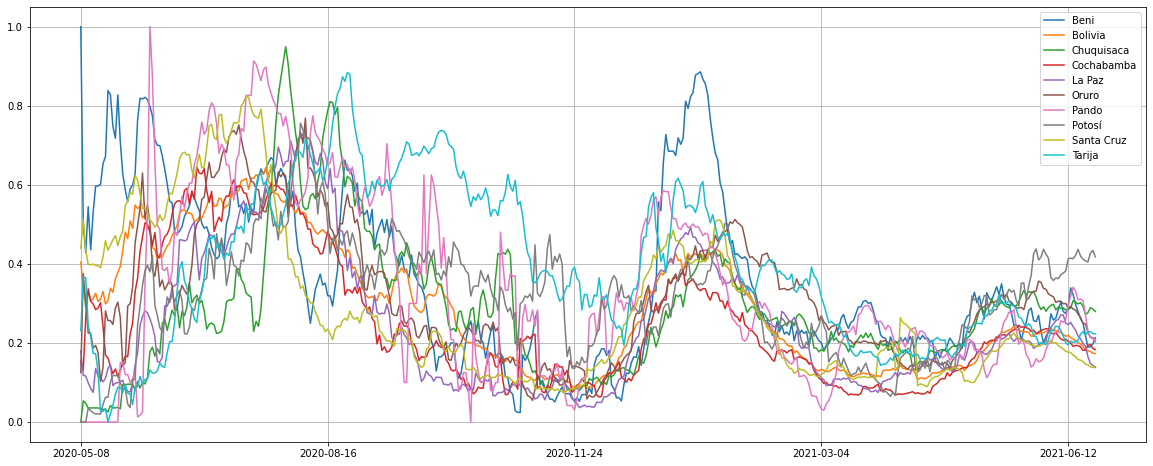

In [ ]:
positividad_diaria_adj.plot(figsize = (20,8))
plt.grid()
plt.savefig(directory+"positividad_diaria_todos")

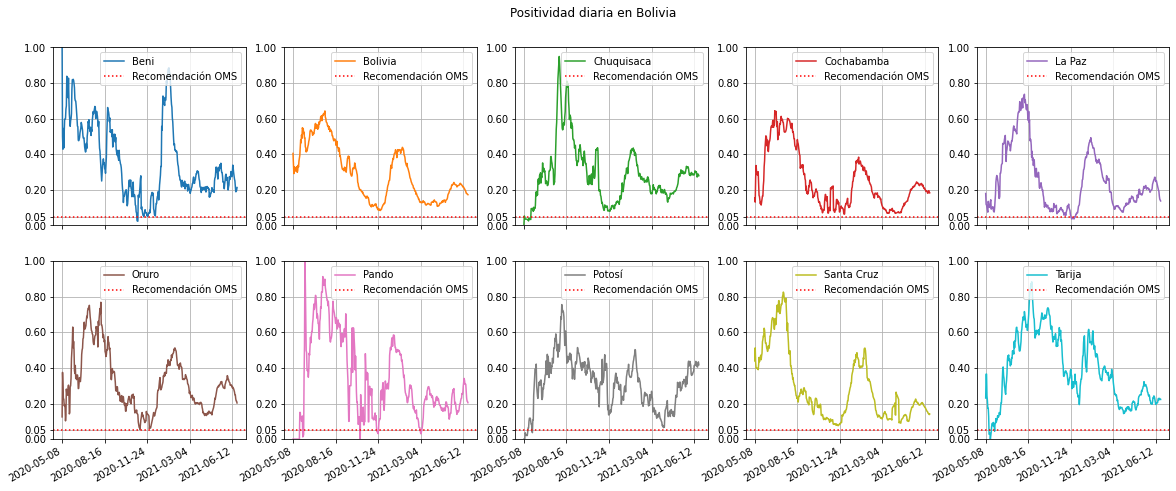

In [ ]:
axs = positividad_diaria_adj.interpolate().plot(subplots=True, layout=(2,5), sharey=False, figsize = (20,8))

axs[0][0].get_figure().suptitle('Positividad diaria en Bolivia', y=.95)
axs = axs.flatten()

for i in range(10):
  axs[i].grid()
  axs[i].set_ylim(0,1)
  axs[i].set_yticks((0,0.05,.2,.4,.6,.8,1))
  axs[i].axhline(y=0.05, color='r', linestyle='dotted',label="Recomendación OMS")
  axs[i].legend()

plt.savefig("/drive/My Drive/Colab Notebooks/epidemiologia/positividad.jpg")

In [ ]:
plt.savefig("/drive/My Drive/Colab Notebooks/epidemiologia/positividad.jpg")

<Figure size 432x288 with 0 Axes>

hi